In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
strDataTest = '/content/drive/MyDrive/Colab Notebooks/Statistical Learning II/Laboratorio3/test.csv'
strDataTrain = '/content/drive/MyDrive/Colab Notebooks/Statistical Learning II/Laboratorio3/Train.csv'

In [39]:
dataTrain = pd.read_csv(strDataTrain)

In [32]:
dataTrain.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [40]:
dataTrainStore = dataTrain.iloc[:, [1,3]].values

In [41]:
dataTrainItem = dataTrain.iloc[:, [2,3]].values

In [42]:
dataTrainStore

array([[ 1, 13],
       [ 1, 11],
       [ 1, 14],
       ...,
       [10, 33],
       [10, 29],
       [10, 28]])

In [43]:
dataTrainItem

array([[ 1, 13],
       [ 1, 11],
       [ 1, 14],
       ...,
       [40, 33],
       [40, 29],
       [40, 28]])

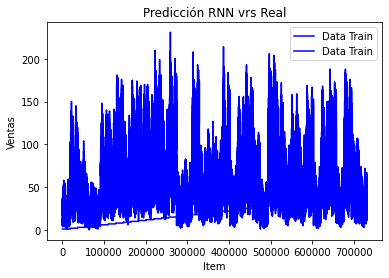

In [44]:
plt.plot(dataTrainItem, color='Blue', label='Data Train')
plt.title('Predicción RNN vrs Real')
plt.xlabel("Item")
plt.ylabel("Ventas")
plt.legend()
plt.show()

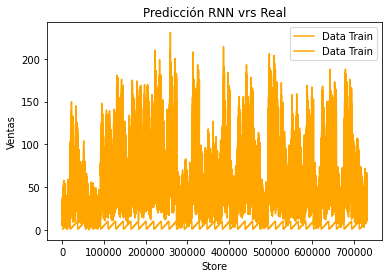

In [45]:
plt.plot(dataTrainStore, color='orange', label='Data Train')
plt.title('Predicción RNN vrs Real')
plt.xlabel("Store")
plt.ylabel("Ventas")
plt.legend()
plt.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dataTrain_scaled = scaler.fit_transform(dataTrainStore)

In [47]:
X_train = []
Y_train = []

#secuenciamos los datos.
cantidad = dataTrain_scaled.shape[0]
ventana = 60
for i in range(ventana, cantidad):
  X_train.append(dataTrain_scaled[i - ventana: i, 0])
  Y_train.append(dataTrain_scaled[i, 0])

In [48]:
X_train = np.array(X_train)
y_train = np.array(Y_train)

In [49]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 

In [50]:
X_train

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]]])

In [51]:
X_train.shape

(730340, 60, 1)

In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [54]:
forecaster = Sequential()

#capa1
forecaster.add(LSTM(input_shape=(X_train.shape[1], 1), units=50, return_sequences=True))

#capa2
forecaster.add(LSTM(units=50, return_sequences=True))

#capa3
forecaster.add(LSTM(units=25, return_sequences=True))

#capa4
forecaster.add(LSTM(units=75, return_sequences=False))

#capa de salida
forecaster.add(Dense(units=1, activation='relu'))

In [55]:
#parametros de optimización
forecaster.compile(optimizer='adam', loss='mean_squared_error')

In [59]:
#parametros de entrenamiento
forecaster.fit(X_train, y_train, epochs=1, batch_size=32)

22824/22824 [==============================] - 1514s 66ms/step - loss: 7.6402e-05


In [60]:
forecaster.save('/content/drive/MyDrive/Colab Notebooks/Statistical Learning II/Laboratorio3/RNN_v1.h5')

In [67]:
dataTest = pd.read_csv(strDataTest)
dataTest.head()

,date,store,item,sales
0,2013-01-01,1,41,6
1,2013-01-02,1,41,15
2,2013-01-03,1,41,5
3,2013-01-04,1,41,9
4,2013-01-05,1,41,13


In [68]:
real_test_price = dataTest.iloc[:, [1,3]].values
real_test_price

array([[ 1,  6],
       [ 1, 15],
       [ 1,  5],
       ...,
       [10, 74],
       [10, 62],
       [10, 82]])

In [80]:
dataset_total = real_test_price
dataset_total

array([[ 1,  6],
       [ 1, 15],
       [ 1,  5],
       ...,
       [10, 74],
       [10, 62],
       [10, 82]])

In [ ]:
input_test = dataset_total[len(dataset_total) - len(dataTest) - ventana : ].values
input_test = input_test.reshape(-1, 1)
input_test = scaler.transform(input_test)
input_test

In [84]:
cantidad_final = len(input_test)
cantidad_final

120

In [85]:
X_test = []
for i in range(ventana, cantidad_final):
  X_test.append(input_test[i - ventana:i, 0])

X_test = np.array(X_test)

In [86]:
X_test.shape

(60, 60)

In [87]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [88]:
X_test.shape

(60, 60, 1)

In [89]:
predicciones_rnn = forecaster.predict(X_test)
predicciones_rnn

array([[1.7692662],
       [1.7716823],
       [1.7695178],
       [1.7716388],
       [1.7692405],
       [1.7716976],
       [1.7694403],
       [1.7716608],
       [1.769305 ],
       [1.771691 ],
       [1.7693737],
       [1.7716786],
       [1.7693148],
       [1.7716906],
       [1.76929  ],
       [1.7716933],
       [1.7692614],
       [1.7716963],
       [1.7692549],
       [1.7716959],
       [1.7694441],
       [1.7716619],
       [1.7693177],
       [1.7716904],
       [1.7692906],
       [1.7716936],
       [1.7692276],
       [1.7717015],
       [1.7692138],
       [1.7717003],
       [1.7694646],
       [1.7716542],
       [1.7691112],
       [1.7717165],
       [1.7694287],
       [1.7716556],
       [1.7694823],
       [1.7716565],
       [1.7695389],
       [1.7716507],
       [1.7693893],
       [1.7716836],
       [1.7692167],
       [1.7717079],
       [1.7692362],
       [1.7716982],
       [1.7691711],
       [1.7717056],
       [1.7694703],
       [1.7716494],


In [90]:
predicciones_rnn.shape

(60, 1)

In [ ]:
#invertimos noramalizacion
real_predicted_price = scaler.inverse_transform(predicciones_rnn)
real_predicted_price

NameError: ignored

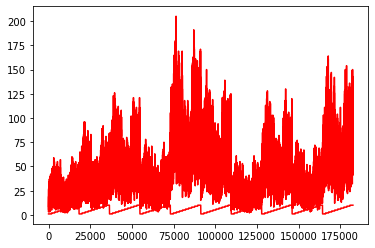

In [93]:
plt.plot(real_test_price, color="red", label="Real")
plt.plot(real_predicted_price, color="blue", label="RNN")
plt.title("Real vrs Predicción RNN")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.show()

In [94]:
!pip install pyramid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 246 kB 31.8 MB/s 
     |████████████████████████████████| 114 kB 110.0 MB/s 
     |████████████████████████████████| 251 kB 76.6 MB/s 
